#  Feature scaling and Learning Rate (Multi-variable)


# Goal
- how learning rate change the cost
- normalize or rescale the training examples

In [22]:
import copy, math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [23]:
#compute derivatve
def derivatve(w,b,y,x):
    m = x.shape[0]
    n = x.shape[1]
    dj_w = np.zeros(n)
    dj_b = 0
    for i in range(m):
        err=(np.dot(w,x[i])+b)-y[i]
        for j in range(n):
            dj_w[j]+=err*x[i][j]
        dj_b+=err
    return dj_w/m,dj_b/m


In [24]:
#gradient
def gradient(w,b,x,y,l_r,times,mod):
    cost = []
    ite = []
    for i in range(times):
        ans = derivatve(w,b,y,x)
        w=w-l_r*ans[0]
        b=b-l_r*ans[1]
        if i % mod ==0:
            cost.append(cost_f(predict(w,b,x),y))
            ite.append(i)
    return w,b,cost,ite

In [25]:
# compute predict output
def predict(w,b,x):
    return np.dot(x,w)+b


In [26]:
#compute cost f (square avreage error)
def cost_f(y_hat,y):
    m = y.shape[0]
    out = 0
    for i in range(m):
        out+=(y_hat[i]-y[i])**2
    return out/(2*m)


# Feature Scaling
- Z-score normalization

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [27]:
def z_score(x):
    m = x.shape[0]
    n = x.shape[1]
    mu =np.mean(X_train,axis=0)
    sigma = np.std(X_train,axis=0)
    X_norm = (x-mu)/sigma
    return X_norm,mu,sigma
            
    

# test the model

ite: 0, cost = 3822.233654274485
ite: 10, cost = 434.300516110813
ite: 20, cost = 241.95733929699458
ite: 30, cost = 221.620729648711
ite: 40, cost = 219.4629536180143
w= [110.45 -21.36 -32.81 -37.92]
b = 363.15608080808084


<AxesSubplot:xlabel='iterations', ylabel='cost'>

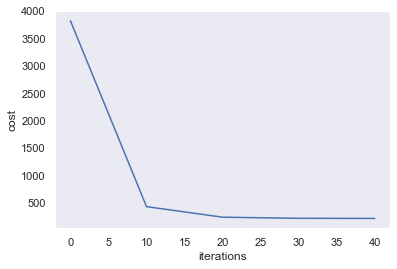

In [28]:
#get result
X_train, y_train = load_house_data()
#X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
#y_train = np.array([460, 232, 178])
#to rescale feature
X_train,mu,sigma = z_score(X_train)
b_i = 0
w_i = np.zeros(X_train.shape[1] )
w,b,cost,ite=gradient(w_i,b_i,X_train,y_train,0.9,50,10)
for i in range(len(cost)):
    print(f"ite: {ite[i]}, cost = {cost[i]}")
print(f"w= {w}")
print(f"b = {b}")
sns.set(style="dark")
dd = {
  "iterations":ite,
  "cost": cost
}
df = pd.DataFrame(dd)
sns.lineplot(x="iterations",
             y="cost",data=df)

In [256]:
#run model 
x=np.array([[1244, 3, 2, 64]])#target=232
#must rescale the input
x = (x-mu)/sigma
#predict
print(np.dot(x,w)+b)

[227.85]
